**Analisando correlação entre os atributos**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


*Leitura do Arquivo*

In [86]:
#Leitura do arquivo
df = pd.read_pickle("df_filtrado.pickle")



In [87]:
df.head()

,AP_PRIPAL,AP_UFMUN,AP_CNSPCN,AP_NUIDADE,AP_SEXO,AP_RACACOR,AP_MUNPCN,AP_UFNACIO,AP_DTINIC,AP_DTFIM,...,FULVESTRANTO,VINORELBINA,GENCITABINA,GOSSERELINA,PAMIDRONATO,PERTUZUMABE,CISPLATINA,LEUPRORRELINA,ABREVIATURA_PROTOCOLO,Total_Medicamentos
918696,0304040029,SP,|{{~~ü|}|ä~{{{â,72,F,1,SP,Brasil,29/05/2009,31/07/2009,...,0,0,0,0,0,0,0,0,DOX,1
1073812,0304040029,SP,|{{~~ü|}|ä~{{{â,72,F,1,SP,Brasil,10/11/2009,31/01/2010,...,0,0,0,0,0,0,0,0,PTX,1
397157,0304040029,ES,|{{~é{ââ|ü{{{Ç,70,F,3,ES,Brasil,15/06/2021,31/08/2021,...,0,0,0,0,0,0,0,0,CFX,1
408520,0304040185,ES,|{{~é{ââ|ü{{{Ç,71,F,3,ES,Brasil,08/09/2021,30/11/2021,...,0,0,0,0,0,0,0,0,DTX,1
13567415,0304040029,RJ,|{{|éâÇ{{{Ç,60,F,2,RJ,Brasil,01/07/2010,30/09/2010,...,0,0,0,0,0,0,0,0,DOX+CFX+5FU,3


In [88]:
df.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'DESFECHO', 'CODIGO_6D', 'PACLITAXEL',
       'DOXORRUBICINA', 'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO',
       'EPIRRUBICINA', 'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO',
       'CAPECITABINA', 'LETROZOL', 'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO',
       'FULVESTRANTO', 'VINORELBINA', 'GENCITABINA', 'GOSSERELINA',
       'PAMIDRONATO', 'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'ABRE

*Convertendo campos de data para timestamp para poder fazer correlação*

In [89]:
# Convertendo a coluna de data para o tipo datetime
df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
df['INICIO'] = pd.to_datetime(df['INICIO'], errors='coerce')
df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')



# Convertendo a data para um timestamp numérico
df['AP_DTINIC'] = df['AP_DTINIC'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['AP_DTFIM'] = df['AP_DTFIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['INICIO'] = df['INICIO'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)
df['FIM'] = df['FIM'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)




C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\3041570925.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTINIC'] = pd.to_datetime(df['AP_DTINIC'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\3041570925.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['AP_DTFIM'] = pd.to_datetime(df['AP_DTFIM'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\3041570925.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FIM'] = pd.to_datetime(df['FIM'], errors='coerce')


In [90]:
# Ordena os casos por cns e data de fim (mais recentes por último)
df_ordenado = df.sort_values(by=['AP_CNSPCN', 'AP_DTFIM'])

# Pega o último caso de cada cns (o mais recente)
df_ultimos_casos = df_ordenado.groupby('AP_CNSPCN').tail(1)


df_ultimos_casos['AP_CNSPCN'].is_unique
print(f"Quantidade de valores únicos na coluna cns: {df_ultimos_casos['AP_CNSPCN'].is_unique}")



Quantidade de valores únicos na coluna cns: True


In [91]:
qtd_alta = (df_ultimos_casos['DESFECHO'] == 'Alta').sum()
print(f"Quantidade de Altas: {qtd_alta}")

total_linhas = len(df_ultimos_casos)
print(f"Total de linhas: {total_linhas}")

porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Alta').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Altas: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Melhora').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Melhoras: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Óbito').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Óbitos: {porcentagem_alta:.2f}%")
porcentagem_alta = (df_ultimos_casos['DESFECHO'] == 'Piora').sum() / len(df_ultimos_casos) * 100
print(f"Porcentagem de Piora: {porcentagem_alta:.2f}%")
df_ultimos_casos['DESFECHO'].isnull().sum()
print(f"Quantidade de valores nulos na coluna DESFECHO: {df_ultimos_casos['DESFECHO'].isnull().sum()}")

df_ultimos_casos['AP_CNSPCN'].is_unique
print(f"Quantidade de valores únicos na coluna cns: {df_ultimos_casos['AP_CNSPCN'].is_unique}")

Quantidade de Altas: 13823
Total de linhas: 53743
Porcentagem de Altas: 25.72%
Porcentagem de Melhoras: 24.84%
Porcentagem de Óbitos: 7.61%
Porcentagem de Piora: 41.82%
Quantidade de valores nulos na coluna DESFECHO: 0
Quantidade de valores únicos na coluna cns: True


In [92]:
df_sem_altas = df[df['DESFECHO'] != 'Alta']

*Trasnformando Variável Categórica em Numérica*

In [93]:
import numpy as np


def valor_desfecho(desfecho):
    if(desfecho=='Melhora'):
        return 1
    elif(desfecho=='Piora'):
        return 0
    elif(desfecho=='Óbito'):
        return 0


df_sem_altas['VALOR_DESFECHO'] = np.vectorize(valor_desfecho)(df_sem_altas['DESFECHO'])
df_sem_altas['VALOR_DESFECHO'].value_counts()
df_analise_valor = df_sem_altas.drop('DESFECHO', axis=1)

C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\2033463406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_altas['VALOR_DESFECHO'] = np.vectorize(valor_desfecho)(df_sem_altas['DESFECHO'])


In [94]:
porcentagem_favoravel = (df_sem_altas['VALOR_DESFECHO'] == 1).sum() / len(df_sem_altas) * 100
print(f"Porcentagem de Favoráveis: {porcentagem_favoravel:.2f}%")
porcentagem_desfavoravel = (df_sem_altas['VALOR_DESFECHO'] == 0).sum() / len(df_sem_altas) * 100
print(f"Porcentagem de Desfavoraveis: {porcentagem_desfavoravel:.2f}%")

Porcentagem de Favoráveis: 33.86%
Porcentagem de Desfavoraveis: 66.14%


In [95]:
df_analise_valor.columns

Index(['AP_PRIPAL', 'AP_UFMUN', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO',
       'AP_RACACOR', 'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN',
       'AQ_ESTADI', 'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'CODIGO_6D', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA', 'ABREVIATURA_PROTOCOLO',

*Usando One-Hot Encoding nas colunas de Localidade*

In [96]:
# Usando pd.get_dummies para fazer One-Hot Encoding
df_analise = pd.get_dummies(df_analise_valor, columns=['AP_UFMUN'], drop_first=False)

# Verificando se existem NaN nas colunas de One-Hot Encoding
print(df_analise.isna().sum())

# Preenchendo NaN com 0 antes de converter para inteiro
df_analise.fillna(0, inplace=True)

# Lista das colunas criadas pelo One-Hot Encoding
one_hot_columns = ['AP_UFMUN_ES', 'AP_UFMUN_MG', 'AP_UFMUN_RJ', 'AP_UFMUN_SP']

# Convertendo as colunas One-Hot Encoding para inteiros
df_analise[one_hot_columns] = df_analise[one_hot_columns].astype(int)

# Mostrando o DataFrame resultante
print(df_analise)


AP_PRIPAL         0
AP_CNSPCN         0
AP_NUIDADE        0
AP_SEXO           0
AP_RACACOR        0
                 ..
VALOR_DESFECHO    0
AP_UFMUN_ES       0
AP_UFMUN_MG       0
AP_UFMUN_RJ       0
AP_UFMUN_SP       0
Length: 61, dtype: int64
           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{ü

In [99]:
# Verificando os valores únicos na coluna 'PROCEDIMENTO_INICIAL'
valores_unicos = df_analise['AP_PRIPAL'].unique()
print(f'Valores únicos na coluna AP_PRIPAL: {valores_unicos}')

df_analise_valor = df_analise


Valores únicos na coluna AP_PRIPAL: ['0304040029' '0304040185' '0304040037' '0304040193' '0304040088'
 '0304040150' '0304040010' '0304040142' '0304040070']


In [100]:
# Certifique-se de que as colunas estão corretamente selecionadas
df_encoded = pd.get_dummies(df_analise_valor['AP_PRIPAL'], prefix='AP_PRIPAL', drop_first=False)

# Concatenando as novas colunas com o DataFrame original
df_analise_valor = pd.concat([df_analise_valor, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise_valor)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{üü{üÇâéé|{          46       F           1   
408788    0304040029  é{üü{üÇü}üééä|{          36       F           3   

         AP_MUNPCN AP_UFNACIO        AP_DTINIC         AP_DTFIM  AP_MOTSAI  \
918696          SP     Brasil 1243555200.0000

In [101]:
# Certifique-se de que as colunas estão corretamente selecionadas
df_encoded = pd.get_dummies(df_analise_valor['PROCEDIMENTO_INICIAL'], prefix='PROCEDIMENTO_INICIAL')

# Concatenando as novas colunas com o DataFrame original
df_analise = pd.concat([df_analise_valor, df_encoded], axis=1)

# Exibindo o resultado
print(df_analise)


           AP_PRIPAL        AP_CNSPCN  AP_NUIDADE AP_SEXO  AP_RACACOR  \
918696    0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
1073812   0304040029  |{{~~ü|}|ä~{{{â          72       F           1   
397157    0304040029  |{{~é{ââ|ü{{{Ç          70       F           3   
408520    0304040185  |{{~é{ââ|ü{{{Ç          71       F           3   
13567415  0304040029  |{{|éâÇ{{{Ç          60       F           2   
...              ...              ...         ...     ...         ...   
14043298  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
14073573  0304040029  é{üü{äÇ|üä}â|{          44       F           1   
5341562   0304040029  é{üü{äÇâü~ÇÇ|{          38       F           2   
6142175   0304040029  é{üü{üÇâéé|{          46       F           1   
408788    0304040029  é{üü{üÇü}üééä|{          36       F           3   

         AP_MUNPCN AP_UFNACIO        AP_DTINIC         AP_DTFIM  AP_MOTSAI  \
918696          SP     Brasil 1243555200.0000

*Transformando colunas em numéricas*

In [102]:
# Caso haja mais colunas, aplique a transformação a elas
colunas_categoricas = ['AQ_CONTTR', 'AQ_LINFIN', 'AQ_TRANTE']  # Colunas com valores 'S' e 'N'
for col in colunas_categoricas:
    df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})




C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\2655021700.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_analise[col] = df_analise[col].replace({'S': 1, 'N': 0})


In [103]:
df_analise.columns

Index(['AP_PRIPAL', 'AP_CNSPCN', 'AP_NUIDADE', 'AP_SEXO', 'AP_RACACOR',
       'AP_MUNPCN', 'AP_UFNACIO', 'AP_DTINIC', 'AP_DTFIM', 'AP_MOTSAI',
       'AP_TRANSF', 'AP_CIDCAS', 'AP_CIDSEC', 'AQ_LINFIN', 'AQ_ESTADI',
       'AQ_GRAHIS', 'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'ESQUEMA_TERAPEUTICO', 'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA', 'INICIO', 'ESTADIAMENTO_INICIO', 'FIM',
       'ESTADIAMENTO_FIM', 'DIF_ESTADIAMENTO', 'TOTAL_TRATAMENTOS',
       'PROCEDIMENTO_INICIAL', 'CODIGO_6D', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA', 'ABREVIATURA_PROTOCOLO',
       'Tot

In [104]:
# Usar to_string para evitar truncamento na visualização
print(df_analise.iloc[0].to_string())


AP_PRIPAL                                 0304040029
AP_CNSPCN                            |{{~~ü|}|ä~{{{â
AP_NUIDADE                                        72
AP_SEXO                                            F
AP_RACACOR                                         1
AP_MUNPCN                                         SP
AP_UFNACIO                                    Brasil
AP_DTINIC                           1243555200.00000
AP_DTFIM                            1248998400.00000
AP_MOTSAI                                         21
AP_TRANSF                                          0
AP_CIDCAS                                       0000
AP_CIDSEC                                       C501
AQ_LINFIN                                          1
AQ_ESTADI                                          3
AQ_GRAHIS                                          2
AQ_TRANTE                                          0
AQ_CONTTR                                          1
AP_APACANT                                    

In [105]:
df_analise.dtypes

AP_PRIPAL                         object
AP_CNSPCN                         object
AP_NUIDADE                         int64
AP_SEXO                           object
AP_RACACOR                         int64
                                   ...  
PROCEDIMENTO_INICIAL_304040037      bool
PROCEDIMENTO_INICIAL_304040070      bool
PROCEDIMENTO_INICIAL_304040142      bool
PROCEDIMENTO_INICIAL_304040185      bool
PROCEDIMENTO_INICIAL_304040193      bool
Length: 86, dtype: object

**Remoção de Atributos Altamente Correlacionados (evitar redundância)**

In [106]:
df_matrix_clinica = df_analise[['AP_NUIDADE',
       'AP_RACACOR', 'AP_DTINIC', 'AP_DTFIM',
       'AP_MOTSAI', 'AP_TRANSF', 'AQ_LINFIN',
       'AQ_ESTADI',  'AQ_TRANTE', 'AQ_CONTTR', 'AP_APACANT',
       'NUMERO_DE_TRATAMENTOS_ANTERIORES',
       'NUMERO_DE_DIAGNOSTICOS_DIFERENTES', 'TEM_CAUSAS_ASSOCIADAS',
       'TEM_CAUSAS_SECUNDARIA',
       'TOTAL_TRATAMENTOS', 'PACLITAXEL', 'DOXORRUBICINA',
       'CICLOFOSFAMIDA', 'FLUOROURACILA', 'METOTREXATO', 'EPIRRUBICINA',
       'DOCETAXEL', 'TRASTUZUMABE', 'TAMOXIFENO', 'CAPECITABINA', 'LETROZOL',
       'ANASTROZOL', 'CARBOPLATINA', 'EXEMESTANO', 'FULVESTRANTO',
       'VINORELBINA', 'GENCITABINA', 'GOSSERELINA', 'PAMIDRONATO',
       'PERTUZUMABE', 'CISPLATINA', 'LEUPRORRELINA',
       'Total_Medicamentos', 'VALOR_DESFECHO','AP_UFMUN_ES', 'AP_UFMUN_MG',
       'AP_UFMUN_RJ', 'AP_UFMUN_SP', 'AP_PRIPAL_0304040010',
       'AP_PRIPAL_0304040029', 'AP_PRIPAL_0304040037', 'AP_PRIPAL_0304040070',
       'AP_PRIPAL_0304040088', 'AP_PRIPAL_0304040142', 'AP_PRIPAL_0304040150',
       'AP_PRIPAL_0304040185', 'AP_PRIPAL_0304040193',
       'PROCEDIMENTO_INICIAL_304020133', 'PROCEDIMENTO_INICIAL_304020141',
       'PROCEDIMENTO_INICIAL_304020338', 'PROCEDIMENTO_INICIAL_304020346',
       'PROCEDIMENTO_INICIAL_304020354', 'PROCEDIMENTO_INICIAL_304020419',
       'PROCEDIMENTO_INICIAL_304020427', 'PROCEDIMENTO_INICIAL_304020435',
       'PROCEDIMENTO_INICIAL_304020443', 'PROCEDIMENTO_INICIAL_304040010',
       'PROCEDIMENTO_INICIAL_304040029', 'PROCEDIMENTO_INICIAL_304040037',
       'PROCEDIMENTO_INICIAL_304040070', 'PROCEDIMENTO_INICIAL_304040142',
       'PROCEDIMENTO_INICIAL_304040185', 'PROCEDIMENTO_INICIAL_304040193'              
]]



*Transformando colunas em tipo inteiro*

In [107]:
df_matrix_clinica['AQ_LINFIN'] = pd.to_numeric(df_matrix_clinica['AQ_LINFIN'], errors='coerce')
df_matrix_clinica['AQ_TRANTE'] = pd.to_numeric(df_matrix_clinica['AQ_TRANTE'], errors='coerce')

# Converter para inteiro
df_matrix_clinica['AQ_LINFIN'] = df_matrix_clinica['AQ_LINFIN'].astype('int')
df_matrix_clinica['AQ_TRANTE'] = df_matrix_clinica['AQ_TRANTE'].astype('int')

df_matrix_clinica.fillna(0, inplace=True)  # Preencher NaN com 0, ou use outro valor se necessário


C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\3559135671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_clinica['AQ_LINFIN'] = pd.to_numeric(df_matrix_clinica['AQ_LINFIN'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\3559135671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix_clinica['AQ_TRANTE'] = pd.to_numeric(df_matrix_clinica['AQ_TRANTE'], errors='coerce')
C:\Users\Rafaela\AppData\Local\Temp\ipykernel_7612\3559135671.py:5: SettingWithCopyWarning: 

In [108]:
# Usar to_string para evitar truncamento na visualização
print(df_matrix_clinica.iloc[0].to_string())

AP_NUIDADE                                        72
AP_RACACOR                                         1
AP_DTINIC                           1243555200.00000
AP_DTFIM                            1248998400.00000
AP_MOTSAI                                         21
AP_TRANSF                                          0
AQ_LINFIN                                          1
AQ_ESTADI                                          3
AQ_TRANTE                                          0
AQ_CONTTR                                          1
AP_APACANT                                         0
NUMERO_DE_TRATAMENTOS_ANTERIORES                   0
NUMERO_DE_DIAGNOSTICOS_DIFERENTES                  1
TEM_CAUSAS_ASSOCIADAS                              1
TEM_CAUSAS_SECUNDARIA                              1
TOTAL_TRATAMENTOS                                  2
PACLITAXEL                                         0
DOXORRUBICINA                                      1
CICLOFOSFAMIDA                                

*Matriz de Correlação*

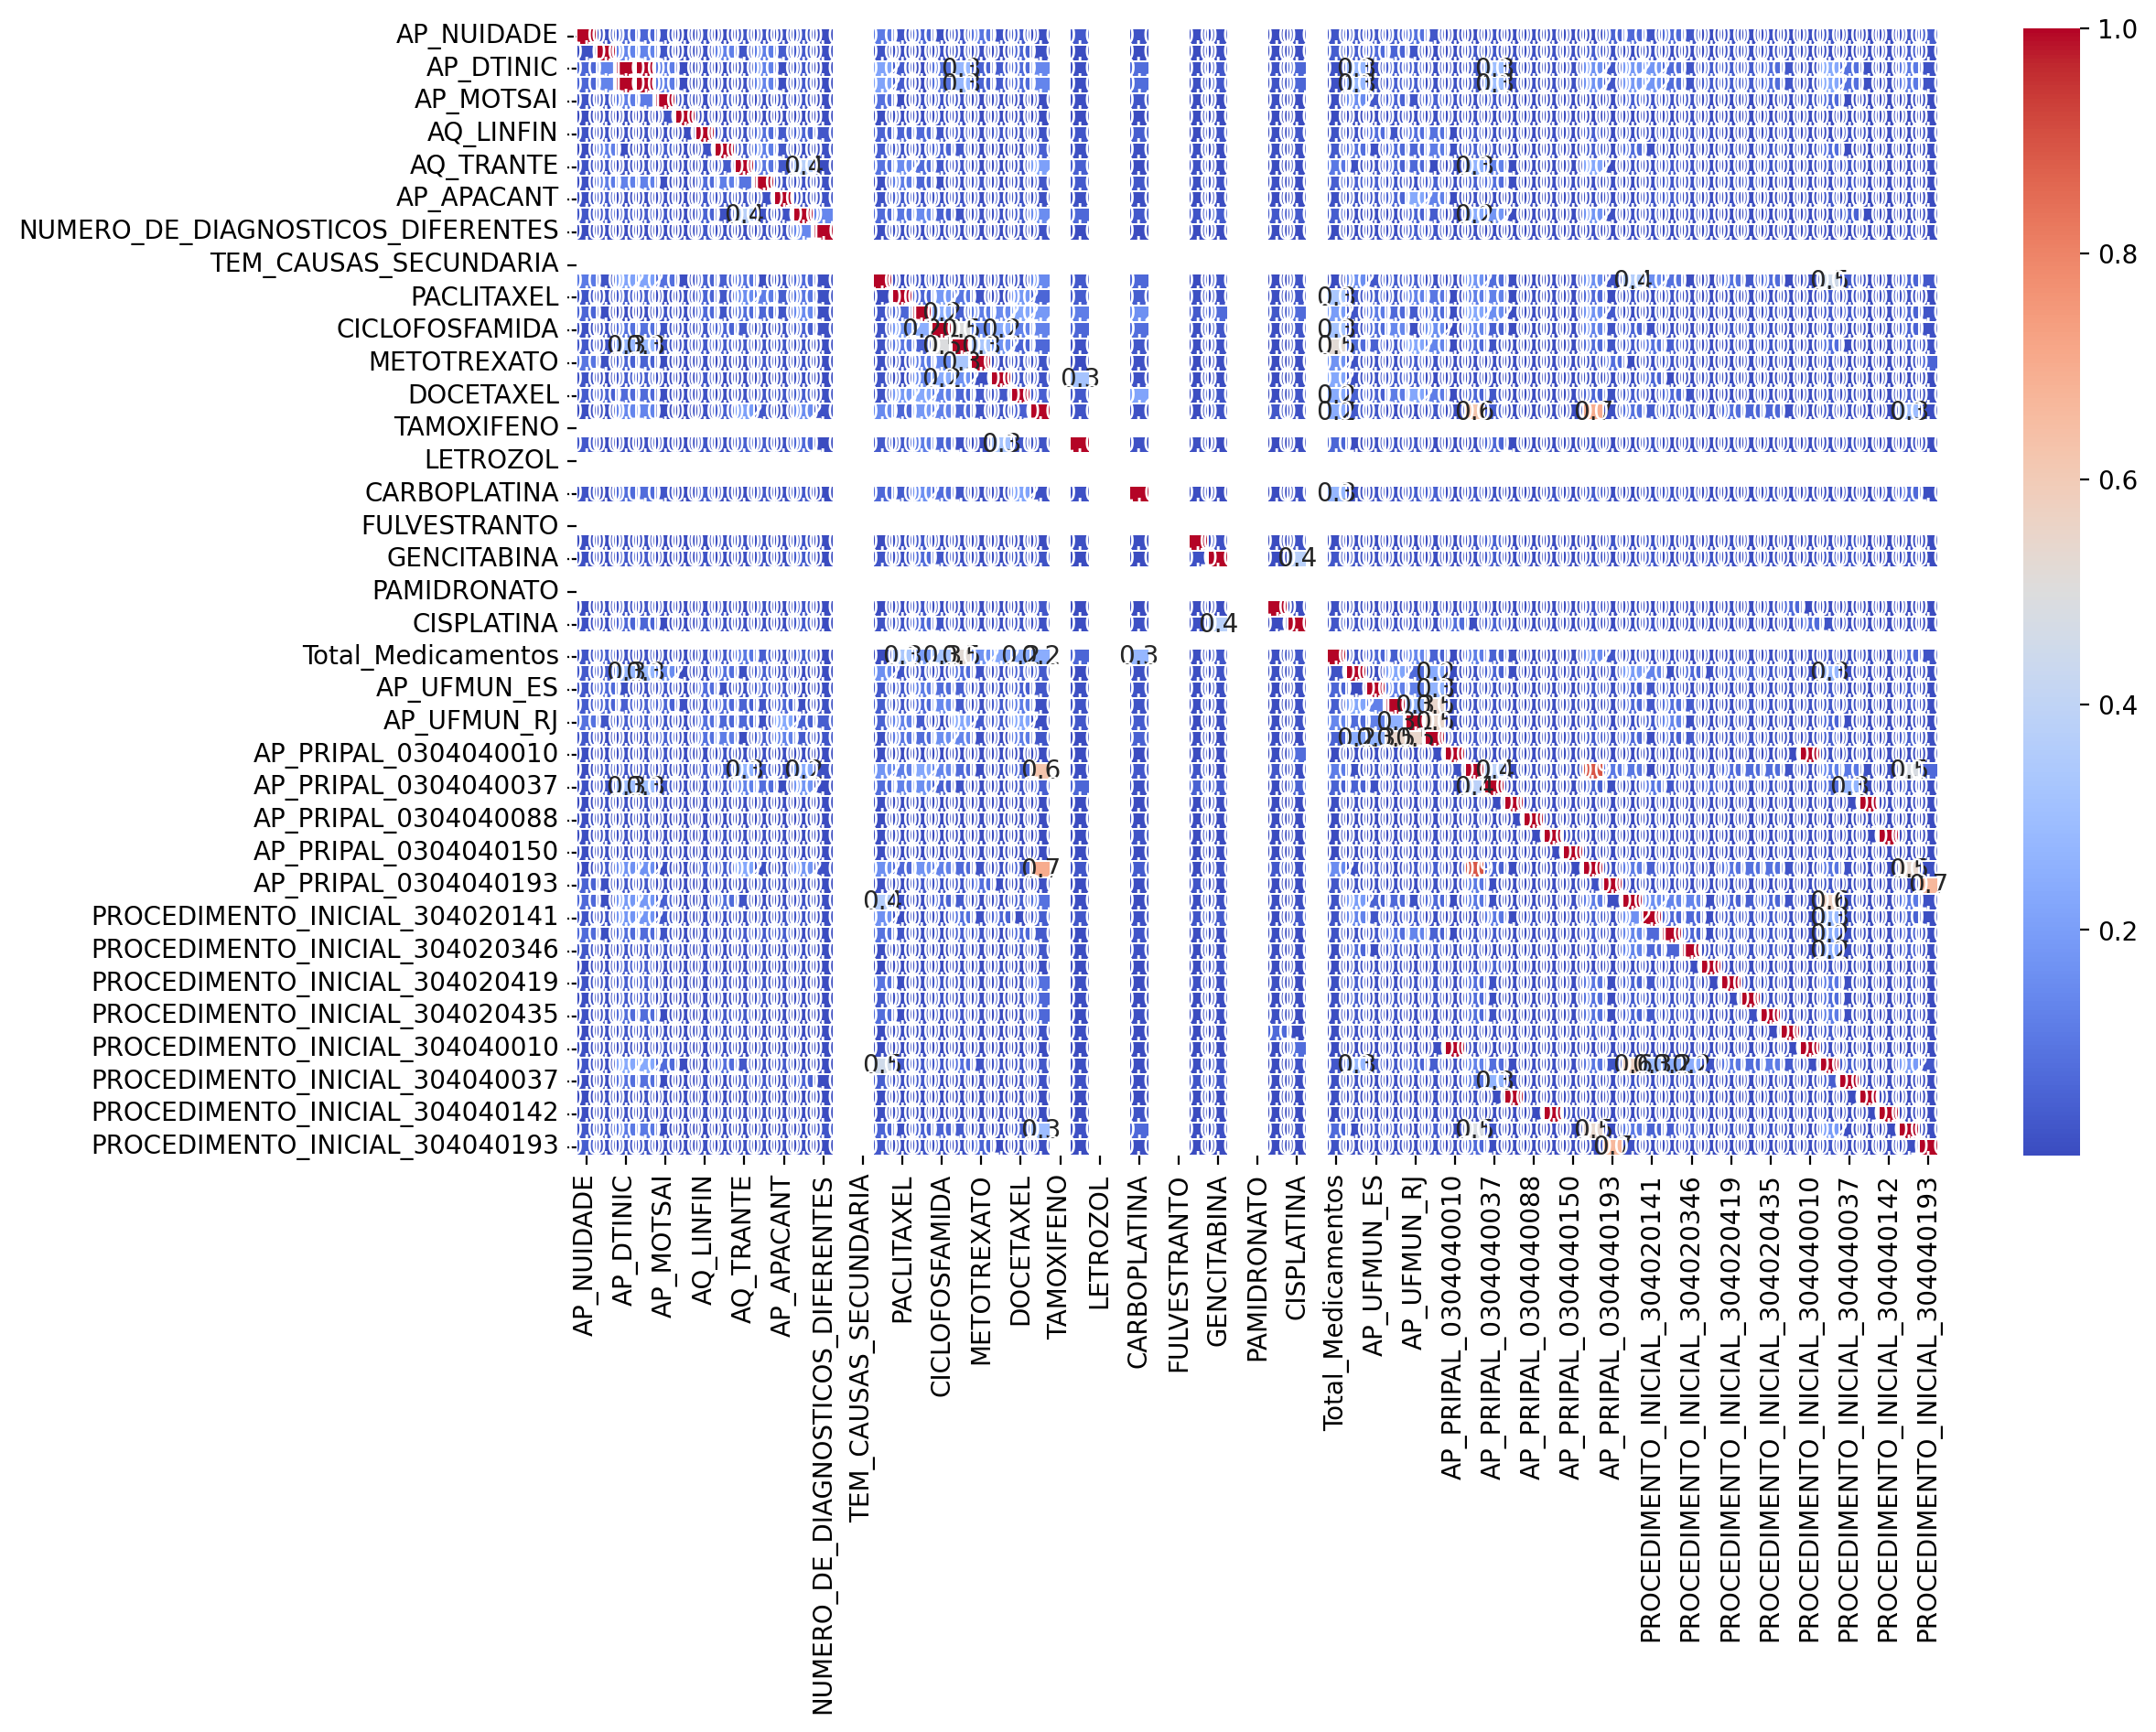

In [109]:

corr_matrix = df_matrix_clinica.corr().abs()
plt.figure(figsize=(12,8),dpi=200)

# Exibir a matriz de correlação para ver os resultados
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.6, cmap='coolwarm')

plt.show()


Ganho de informação

In [110]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Separa features (X) e alvo (y)
X = df_matrix_clinica.drop('VALOR_DESFECHO', axis=1).copy()
y = df_matrix_clinica['VALOR_DESFECHO']

# Codifica variáveis categóricas (se houver)
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Calcula o ganho de informação (mutual information)
importancias = mutual_info_classif(X, y, discrete_features=True)

# Cria um DataFrame com os resultados
importancia_df = pd.DataFrame({
    'Variável': X.columns,
    'Ganho de Informação': importancias
}).sort_values(by='Ganho de Informação', ascending=False)

print(importancia_df)


                          Variável  Ganho de Informação
2                        AP_DTINIC              0.13370
3                         AP_DTFIM              0.08199
62  PROCEDIMENTO_INICIAL_304040029              0.03995
42                     AP_UFMUN_SP              0.02841
40                     AP_UFMUN_MG              0.02337
..                             ...                  ...
29                      EXEMESTANO              0.00000
30                    FULVESTRANTO              0.00000
33                     GOSSERELINA              0.00000
37                   LEUPRORRELINA              0.00000
34                     PAMIDRONATO              0.00000

[68 rows x 2 columns]


In [111]:
print(importancia_df.to_string())


                             Variável  Ganho de Informação
2                           AP_DTINIC              0.13370
3                            AP_DTFIM              0.08199
62     PROCEDIMENTO_INICIAL_304040029              0.03995
42                        AP_UFMUN_SP              0.02841
40                        AP_UFMUN_MG              0.02337
52     PROCEDIMENTO_INICIAL_304020133              0.02117
10                         AP_APACANT              0.01818
15                  TOTAL_TRATAMENTOS              0.01590
4                           AP_MOTSAI              0.01551
7                           AQ_ESTADI              0.01347
53     PROCEDIMENTO_INICIAL_304020141              0.00982
19                      FLUOROURACILA              0.00330
38                 Total_Medicamentos              0.00267
41                        AP_UFMUN_RJ              0.00260
55     PROCEDIMENTO_INICIAL_304020346              0.00211
1                          AP_RACACOR              0.001

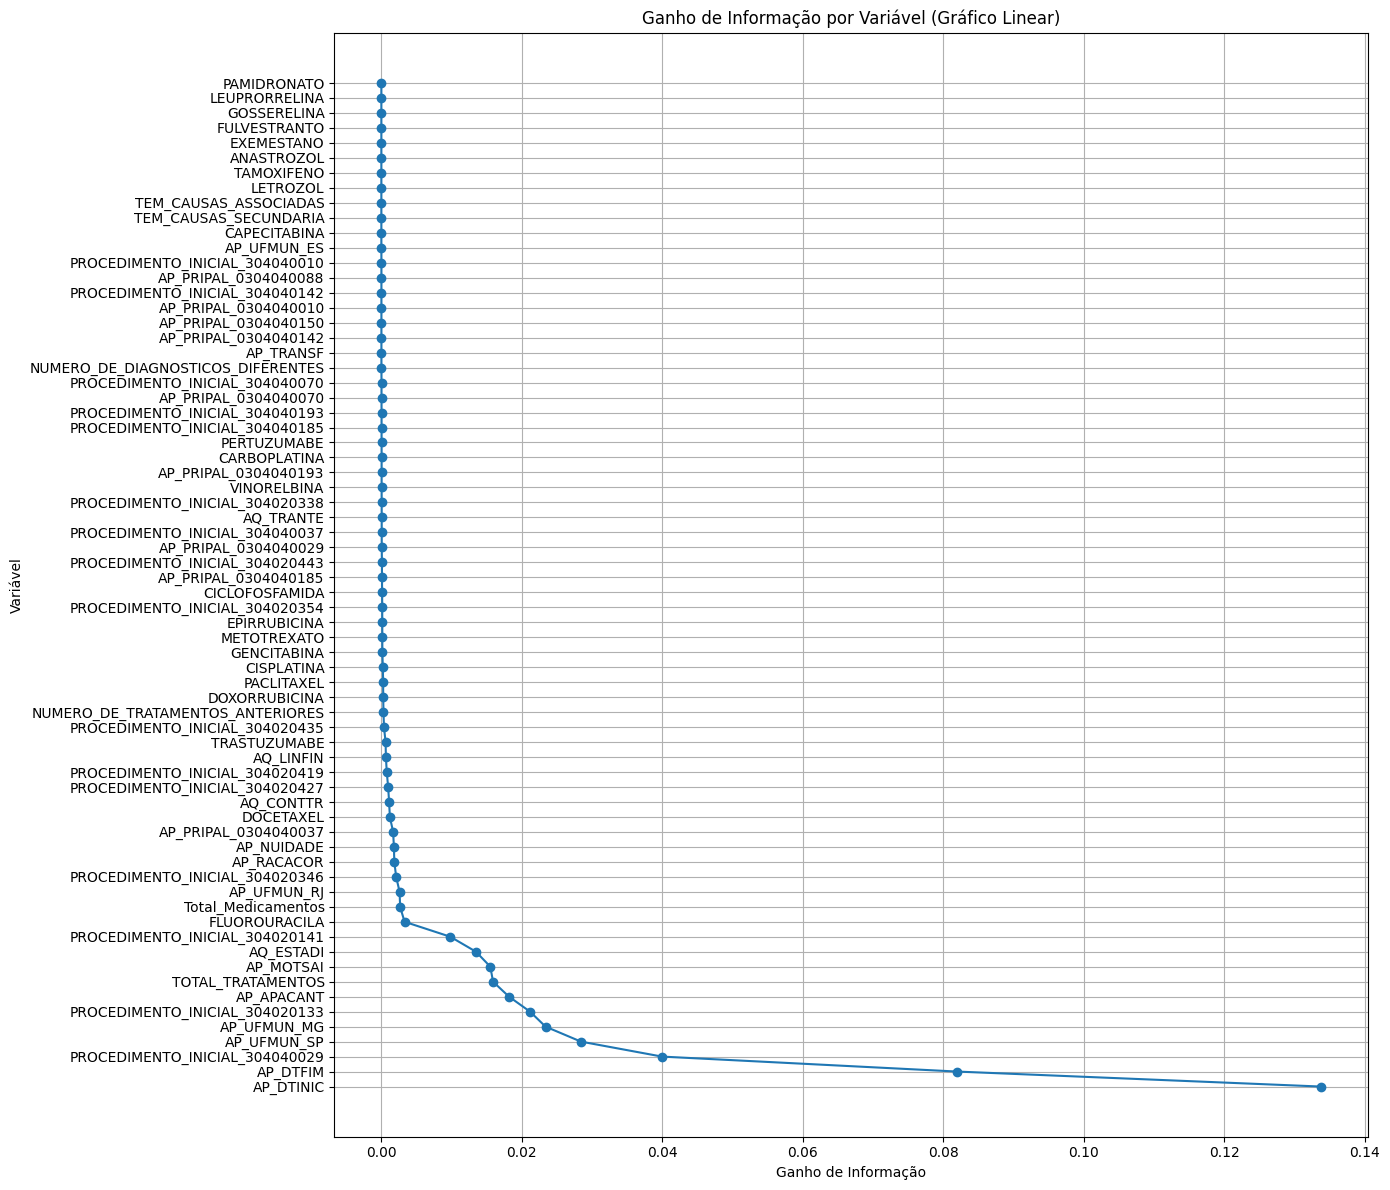

In [117]:

# Plot linear (linha conectando pontos)
plt.figure(figsize=(14, 12))
plt.plot(importancia_df['Ganho de Informação'], importancia_df['Variável'], marker='o', linestyle='-')
plt.xlabel('Ganho de Informação')
plt.ylabel('Variável')
plt.title('Ganho de Informação por Variável (Gráfico Linear)')
plt.grid(True)
plt.tight_layout()
plt.show()

